### NOTE FOR LUCA

**Remember to set/remove metadata as:**
{
  "nbsphinx": "hidden"
}

to enable/disable solutions view

## Before you start
**Please write one single python script.**

**IMPORTANT: Add your name and ID (matricola) on top of the .py file!**

## The Problem

The .tsv file ```gene_models.tsv``` is a compact representation of the gene models on the genome having sequence specified in ```sequences.fasta```. The first few lines are reported below:
```
Chr     feature start   end     ID
Chr05   gene    50988   51101   gene:MD05G1000100
Chr05   ncRNA   50988   51101   ncRNA:MD05G1000100
Chr05   gene    83210   83329   gene:MD05G1000200
Chr05   ncRNA   83210   83329   ncRNA:MD05G1000200
Chr05   gene    87650   91333   gene:MD05G1000300
Chr05   mRNA    87650   91333   mRNA:MD05G1000300
Chr05   CDS     87650   87727   CDS:MD05G1000300.8
```

as the header (first line) describes, the first column is the chromosome containing the feature (that can be gene, ncRNA, exon, CDS, ...), the third and fourth columns are the start and end position of the feature on the chromosome and the fifth row is the identifier of the feature ID. **Note that, unlike python strings, features in ```gene_models``` start from coordinate 1 instead of 0.**

The ```file sequences.fasta``` stores sequence information in .fasta format. A mock entry is the following:
```
>Chr01 
AGGCCTAGGTCTTCCAGAGTCGCTTTTTCCAGCTCCAGACCGATCTCTTCAG
AGGCCAATCGCCAGTTTACCACATACACCCAGACCGATCTCTTCAG
```
where the first line is the identifier of the read and starts with a ">". The sequence follows the line with the identifier and can be on multiple lines.

Implement the following python functions:

1. ```computeGeneStats(filename)```: gets the ```filename``` of a .tsv file as explained above, stores its content in a suitable data structure of your choice (hint: pandas might help here), counts (and prints) the number of features of type gene, printing the minimum, maximum and average gene length in the whole file. The function should also produce a bar plot of the number of genes per chromosome.

**Note: The function should return the data structure containing all the data.**

Calling:
```
fn = "gene_models.tsv"
seqFile = "sequences.fasta"
GenesDF = computeGeneStats(fn)
```
should give:
```
29136 genes present
Avg gene length: 2724.71
Min gene length: 45
Max gene length: 53052
```
![](img/midterm/midtermplot.png)

2. ```printSequence(geneInfo, geneID, sequenceFile)```: gets the ```geneInfo``` data structure **created by computeGeneStats**, a **gene identifier** ```geneID``` and **the filename of a fasta formatted file** ```sequenceFile``` and if ```geneID``` is present in ```geneInfo``` it **prints its length and a fasta-formatted string reporting the sequence of the gene** Note that chromosome, start and end position are saved in ```geneInfo```.  If the chromosome is not in the sequenceFile or geneID is not in geneInfo the function should display a corresponding message (see examples below). Optional: add a parameter ```outFile``` with default value None, that if set (it will contain the path to an output file) makes the function write the fasta entries to file ```outFile``` rather than to the screen.

**Hint: you can use biophtyon to read a fasta file.** 

For example, assuming an entry:
```
ChrX   gene   3   7   gene:geneid1
```
in ```geneInfo``` and a sequence:
```
>ChrX
GATTACATAACACACTACA
```
in ```sequenceFile```, calling ```printSequence(geneInfo,"geneid1",sequenceFile)``` should print:
```
Gene geneid1 is in ChrX and has length 5
>geneid1:ChrX:3_7
TTACA
```
Given ```GenesDF``` as returned by computeGeneStats, calling:
```
printSequence(GenesDF,"MD05G1000100",seqFile)
print("")
printSequence(GenesDF,"MD03G1000400",seqFile)
print("")
printSequence(GenesDF,"MD08G1000100",seqFile)
print("")
printSequence(GenesDF,"MD08G100019191",seqFile)
```
should give:
```
Gene MD05G1000100 is in Chr05 and has length 114
>MD05G1000100:Chr05:50988_51101
CGCCCAAGGGAGTGGATCCTGTAAGCCTTATATGTATATTCCCATCTCTACCTAGCACGAGGCCTTTTGGGAGCTCATTGGCTTCGGGTTATTGTCACATCCCGACCCGAGCCC

Gene MD03G1000400 is in Chr03 and has length 189
>MD03G1000400:Chr03:21801_21989
CGTATTATAGGAATTCTTCTTCCATTGAAAGGATGGATTGAAAGGATGGATGGCATGTTGTCTATACCTCTCGTCATTAGGATGTACAATAATGGCAGTATCACCGAGCATAGTTTCCACTCTAGTGGTGGCCACCATAATCTCACCAAAGTCTTCCTCTAGAGTATAAGCAAATGAAGTTAACATGCC

Gene MD08G1000100 is in Chr08 and has length 5384
Chr08 is not present in the sequence file.

GeneID MD08G100019191 is not present in the input file.
Gene MD05G1000100 is in Chr05 and has length 114
```

3. (Optional) Modify the function ```computeGeneStats(filename)``` to make it also plot a boxplot of the gene lengths per chromosome.

Expected output:
![](img/midterm/midtermboxplot.png)


### A possible solution: 

29136 genes present
Avg gene length: 2724.71
Min gene length: 45
Max gene length: 53052


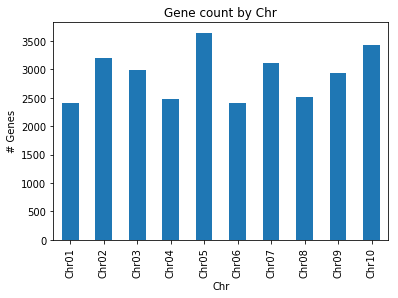

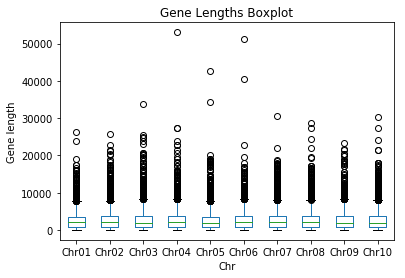

Gene MD05G1000100 is in Chr05 and has length 114
>MD05G1000100:Chr05:50988_51101
CGCCCAAGGGAGTGGATCCTGTAAGCCTTATATGTATATTCCCATCTCTACCTAGCACGAGGCCTTTTGGGAGCTCATTGGCTTCGGGTTATTGTCACATCCCGACCCGAGCCC

Gene MD03G1000400 is in Chr03 and has length 189
>MD03G1000400:Chr03:21801_21989
CGTATTATAGGAATTCTTCTTCCATTGAAAGGATGGATTGAAAGGATGGATGGCATGTTGTCTATACCTCTCGTCATTAGGATGTACAATAATGGCAGTATCACCGAGCATAGTTTCCACTCTAGTGGTGGCCACCATAATCTCACCAAAGTCTTCCTCTAGAGTATAAGCAAATGAAGTTAACATGCC

Gene MD08G1000100 is in Chr08 and has length 5384
Chr08 is not present in the sequence file.

GeneID MD08G100019191 is not present in the input file.
Gene MD05G1000100 is in Chr05 and has length 114


In [93]:
%reset -f
"""exercise.py"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Bio import SeqIO


def computeGeneStats(filename):
    geneInfo = pd.read_csv(filename, sep="\t", header = 0)
    genes = geneInfo[ geneInfo["feature"] == "gene"] 
    #print(genes.head())
    print("{} genes present".format(genes.shape[0]))
    #print(genes.head())
    avg = np.mean(genes["end"] - genes["start"] + 1)
    m = np.min(genes["end"] - genes["start"] + 1 )
    M = np.max(genes["end"] - genes["start"] + 1 )
    print("Avg gene length: {:.2f}\nMin gene length: {}\nMax gene length: {}".format(avg, m, M))
        
    grpd = genes.groupby(["Chr"])
    agg = grpd.aggregate(pd.DataFrame.count)["feature"]
    agg.plot(kind = 'bar')
    plt.title("Gene count by Chr")
    plt.ylabel("# Genes")
    plt.xlabel("Chr")
    plt.show()
    
    bpdata = {}
    for i, g in grpd:
        if(i not in bpdata):
            bpdata[i] = []
        bpdata[i] = g["end"] - g["start"]

    pdData = pd.DataFrame(bpdata)
    pdData.plot(kind='box')
    plt.title("Gene Lengths Boxplot")
    plt.ylabel("Gene length")
    plt.xlabel("Chr")
    plt.show()
   
    return geneInfo

def printSequence(geneInfo, geneID, sequenceFile, outFile = None):
        gn = "gene:" + geneID
        gene = geneInfo[geneInfo["ID"] == gn]
        of = None
        if outFile != None:
            of = open(outFile, "w")
        
        if len(gene) > 0:
            seqDict = SeqIO.to_dict(SeqIO.parse(sequenceFile, "fasta"))
            chr = gene.iloc[0]["Chr"]
            start = gene.iloc[0]["start"]
            end = gene.iloc[0]["end"]
            print("Gene {} is in {} and has length {}".format(geneID,chr, end-start + 1))
            if chr in seqDict:
                s = seqDict[chr].seq[start-1:end ]
                if outFile != None:
                    of.write(">"+geneID + ":" + chr +":" + str(start) + "_" + str(end)+"\n")
                    of.write(str(s)+"\n")
                else:
                    print(">"+geneID + ":" + chr +":" + str(start) + "_" + str(end))
                    print(str(s))
            else:
                print(chr, "is not present in the sequence file.")
            
        else:
            print("GeneID {} is not present in the input file.".format(geneID))
        
        if outFile != None:
            of.close()



fn = "./midterm_sim/gene_models.tsv"
seqFile = "./midterm_sim/sequences.fasta"

GenesDF = computeGeneStats(fn)
printSequence(GenesDF,"MD05G1000100",seqFile)
print("")
printSequence(GenesDF,"MD03G1000400",seqFile)
print("")
printSequence(GenesDF,"MD08G1000100",seqFile)
print("")
printSequence(GenesDF,"MD08G100019191",seqFile)

printSequence(GenesDF,"MD05G1000100",seqFile, "MD05G1000100.fasta")

